In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

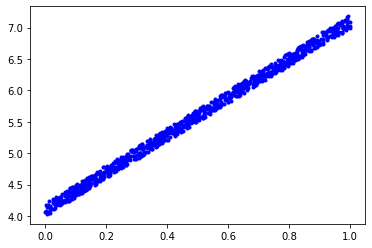

[[0.]
 [1.]]


In [5]:
#y=4+3x
x=np.random.rand(1000,1)
y=4+3*x+.2*np.random.rand(1000,1)
one=np.ones((x.shape[0],1))
xbar=np.concatenate((one, x), axis=1)
plt.plot(x, y, 'b.')
def cost(w):
    N=xbar.shape[0]
    return .5/N*np.linalg.norm(y-xbar.dot(w))**2
def grad(w):
    N=xbar.shape[0]
    return 1./N*xbar.T.dot(xbar.dot(w)-y)
plt.show()

In [53]:
# đạo hàm tại một điểm
def sgrad(w, i, rd_id):
    true_i=rd_id[i]
    xi=xbar[true_i, :]
    yi=y[true_i]
    a=np.dot(xi, w)-yi
    return (xi*a).reshape(2,1)
# thuật toán sử dụng để tính đạo hàm tại một điểm làm giảm việc tính toán
# trên toàn bộ dữ liệu

def SGD(w_init, sgrad, eta):
    w=[w_init]
    w_last_check=w_init
    iter_check_w=10
    N=x.shape[0]
    count=0
    for it in range(10):
        # shuffle data
        # tạo một hoán vị ngẫu nhiên
        rd_id=np.random.permutation(N)
        for i in range(N):
            # đếm số lần lặp
            count+=1
            # liên tục tính đạo hàm 10 điểm
            g=sgrad(w[-1], i, rd_id)
            w_new=w[-1]-eta*g
            w.append(w_new)
            # đến điểm thứ 10 thì kiểm tra
            if count%iter_check_w==0:
                w_this_check=w_new
                if np.linalg.norm(w_this_check-w_last_check)/len(w_init)< 1e-4:
                    return w
                w_last_check=w_this_check
    return w
w_init=3*np.ones((2,1))
print(w_init)
w=SGD(w_init, sgrad, 0.01)
print(w[-1])
print(len(w))

[[3.]
 [3.]]
[[4.03794974]
 [3.12310735]]
2071
